#Load Data

In [1]:
# 1. Load the data and save it to a pandas dataframe
# 2. EDA
# 3. Preprocessing: Deal with missing values (replace or drop)
# 4. Preprocessing: Deal with non-number value-encode to categorical(numeric) data
# 5. Feature selection: define X, Y (using correlation matrix) -
#    not all features can be processed
# 6. Split the data to 70:30
# 7. Train the data using several models
# 8. Evaluate the model
# 9. Improve the model: Data resampling (OPT)
# 10. Improve the model: Hyperparameter tuning


In [2]:
import pandas as pd
import seaborn as sb

In [3]:
!wget https://raw.githubusercontent.com/andrychowanda/COMP6577/refs/heads/master/titanic_train.csv

--2025-05-15 02:53:30--  https://raw.githubusercontent.com/andrychowanda/COMP6577/refs/heads/master/titanic_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72499 (71K) [text/plain]
Saving to: ‘titanic_train.csv’

titanic_train.csv   100%[===================>]  70.80K  --.-KB/s    in 0.001s  

2025-05-15 02:53:30 (77.5 MB/s) - ‘titanic_train.csv’ saved [72499/72499]



In [4]:
data = pd.read_csv('titanic_train.csv')

#EDA

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           676 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


In [6]:
print(data["survived"].value_counts())

survived
0    537
1    313
Name: count, dtype: int64


<Axes: >

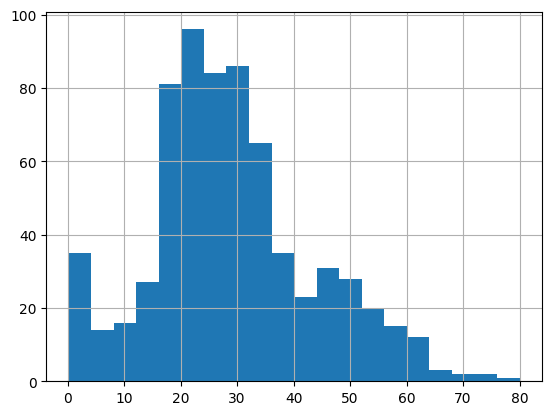

In [7]:
data["age"].hist(bins=20)

<Axes: >

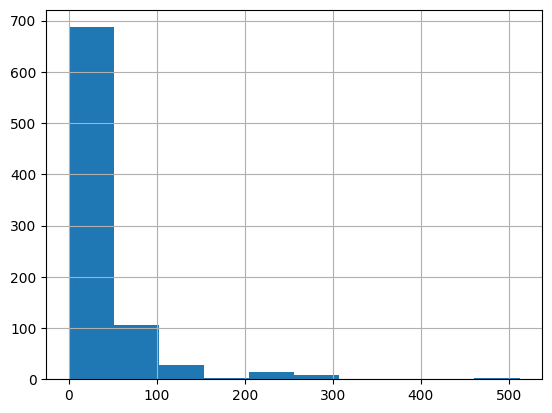

In [8]:
data["fare"].hist(bins=10)

In [9]:
data["pclass"].value_counts()

,count
pclass,
3,478
1,206
2,166


<ipython-input-10-f517af1f314c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(data["sex"], palette="viridis")


<Axes: xlabel='count', ylabel='sex'>

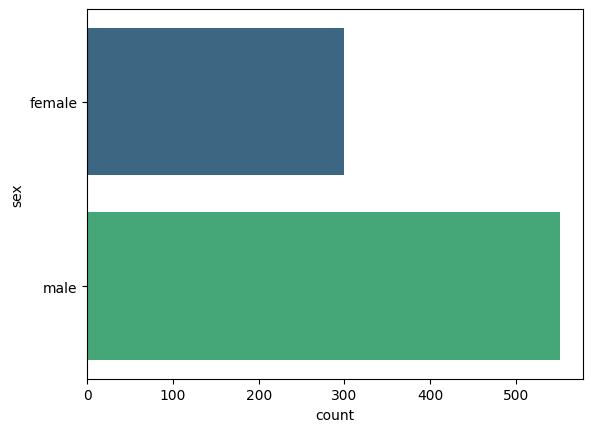

In [10]:
sb.countplot(data["sex"], palette="viridis")

<ipython-input-11-1bc0791dbd55>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(data["embarked"], palette="viridis")


<Axes: xlabel='count', ylabel='embarked'>

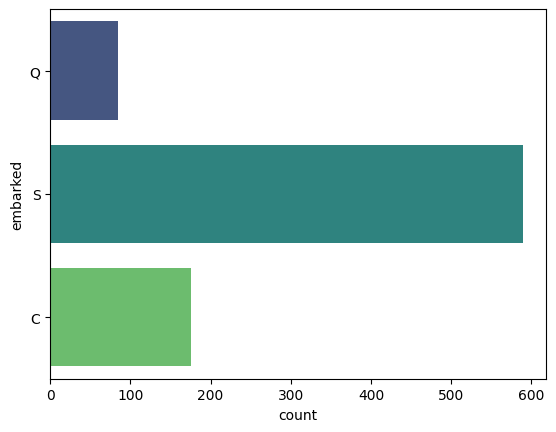

In [11]:
sb.countplot(data["embarked"], palette="viridis")

<Axes: xlabel='sex', ylabel='survived'>

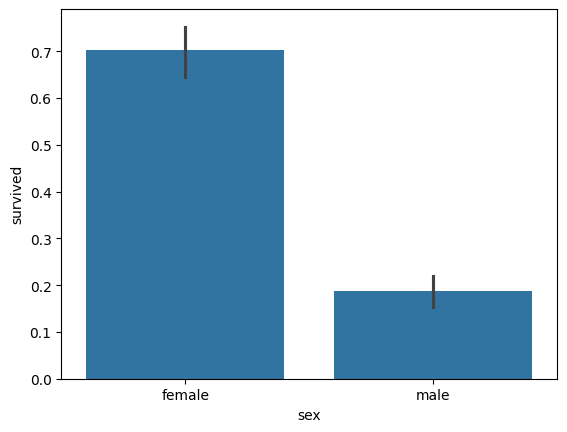

In [12]:
sb.barplot(x="sex", y="survived", data=data)

<Axes: xlabel='pclass', ylabel='survived'>

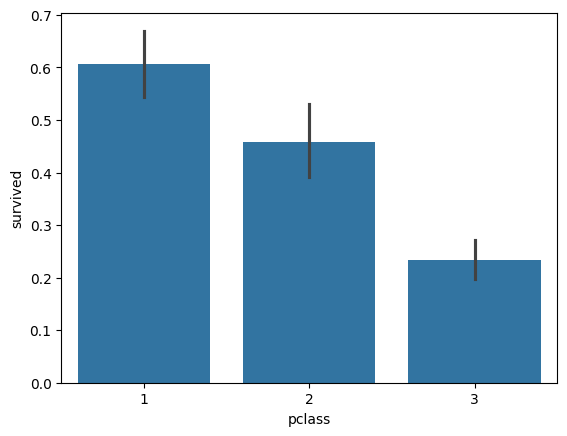

In [13]:
sb.barplot(x="pclass", y="survived", data=data)

<Axes: xlabel='embarked', ylabel='survived'>

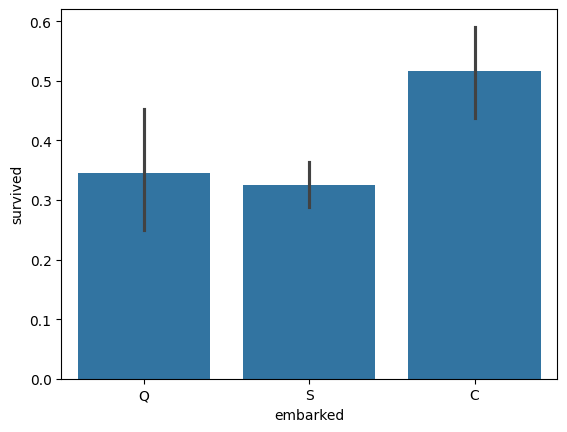

In [14]:
sb.barplot(x="embarked", y="survived", data=data)

# Preprocessing: Deal with missing values

In [15]:
data["age"] = data["age"].fillna(data["age"].mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           850 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


In [16]:
data["fare"] = data["fare"].fillna(data["fare"].mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           850 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          850 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


In [17]:
data["cabin"] = data["cabin"].fillna("U")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           850 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          850 non-null    float64
 9   cabin         850 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


In [18]:
data = data.dropna(subset="embarked")
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 849 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  849 non-null    int64  
 1   pclass        849 non-null    int64  
 2   name          849 non-null    object 
 3   sex           849 non-null    object 
 4   age           849 non-null    float64
 5   sibsp         849 non-null    int64  
 6   parch         849 non-null    int64  
 7   ticket        849 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         849 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          307 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      849 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 106.1+ KB


In [19]:
print(data["cabin"].value_counts())
data["cabin"] = data["cabin"].map(lambda x: x[0])
print(data["cabin"].value_counts())

cabin
U                  659
B57 B59 B63 B66      4
B96 B98              4
G6                   4
D                    4
                  ... 
C46                  1
E31                  1
C93                  1
C39                  1
B37                  1
Name: count, Length: 135, dtype: int64
cabin
U    659
C     62
B     44
D     31
E     24
F     12
A     12
G      4
T      1
Name: count, dtype: int64


#Preprocessing: Deal with non-number value

In [20]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data["sex"] = encoder.fit_transform(data["sex"])
data["embarked"] = encoder.fit_transform(data["embarked"])
data["cabin"] = encoder.fit_transform(data["cabin"])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 849 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  849 non-null    int64  
 1   pclass        849 non-null    int64  
 2   name          849 non-null    object 
 3   sex           849 non-null    int64  
 4   age           849 non-null    float64
 5   sibsp         849 non-null    int64  
 6   parch         849 non-null    int64  
 7   ticket        849 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         849 non-null    int64  
 10  embarked      849 non-null    int64  
 11  boat          307 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      849 non-null    int64  
dtypes: float64(3), int64(8), object(4)
memory usage: 106.1+ KB


#Feature Selection

<Axes: >

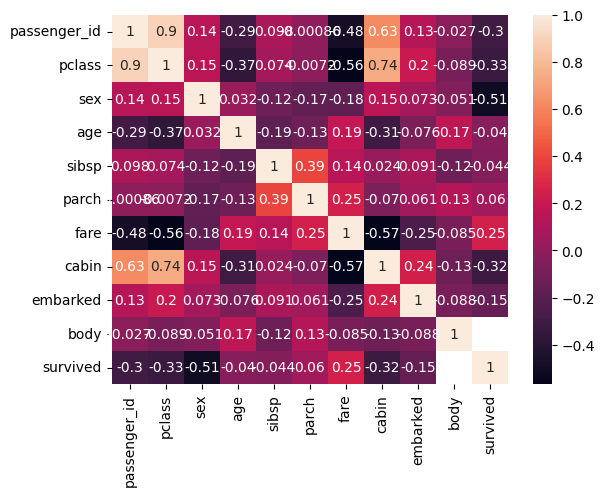

In [21]:
dataCorr = data.corr(numeric_only=True)
sb.heatmap(dataCorr, annot=True)

In [22]:
X = data[["pclass", "sex", "fare", "cabin"]]
Y = data["survived"]

In [23]:
from sklearn.model_selection import train_test_split

XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=0.3,
                                                random_state=42)

# Ensemble

In [25]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [49]:
svm = SVC(probability=True, kernel='rbf', random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
dt = DecisionTreeClassifier(criterion = "gini", max_depth = 3000, random_state=42)

In [50]:
ensemble = VotingClassifier(estimators=[
    ('svm', svm),
    ('knn', knn),
    ('dt', dt)
], voting='soft')


In [51]:
ensemble.fit(XTrain, YTrain)

VotingClassifier(estimators=[('svm', SVC(probability=True, random_state=42)),
                             ('knn', KNeighborsClassifier(n_neighbors=3)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=3000,
                                                     random_state=42))],
                 voting='soft')

In [52]:
from sklearn.metrics import classification_report

YTestPred = ensemble.predict(XTest)
YTrainPred = ensemble.predict(XTrain)
print("Train : " , classification_report(YTrain, YTrainPred))
print("Test : ", classification_report(YTest, YTestPred))

Train :                precision    recall  f1-score   support

           0       0.92      0.97      0.94       368
           1       0.94      0.86      0.90       226

    accuracy                           0.93       594
   macro avg       0.93      0.91      0.92       594
weighted avg       0.93      0.93      0.93       594

Test :                precision    recall  f1-score   support

           0       0.83      0.78      0.80       169
           1       0.61      0.70      0.65        86

    accuracy                           0.75       255
   macro avg       0.72      0.74      0.73       255
weighted avg       0.76      0.75      0.75       255



In [53]:
from sklearn.metrics import roc_auc_score

print("Train : " , roc_auc_score(YTrain, YTrainPred))
print("Test : ", roc_auc_score(YTest, YTestPred))

Train :  0.9128991919969218
Test :  0.7364111737993669


<Axes: xlabel='Predicted', ylabel='Actual'>

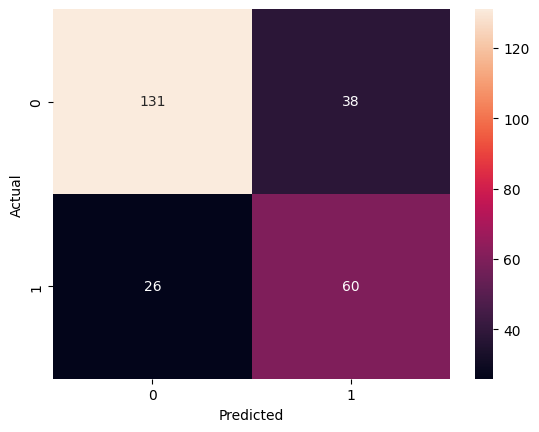

In [54]:
ConfusionMatrixDisplay = pd.crosstab(YTest, YTestPred,
                                    rownames=['Actual'], colnames=['Predicted'])
sb.heatmap(ConfusionMatrixDisplay, annot=True, fmt=".0f")

#Data Resampling

In [55]:
#0    537 -> 312  -> 537
#1    312 -> 312  -> 537

nNot, nSurvived = data["survived"].value_counts()
dataSurvived = data[data["survived"] == 1]
dataNot = data[data["survived"] == 0]

dataNot = dataNot.sample(nSurvived)
dataTitanicUResampled = pd.concat([dataNot, dataSurvived], axis=0)

print(dataTitanicUResampled["survived"].value_counts())
print(dataTitanicUResampled.info())
print(dataTitanicUResampled.describe())

survived
0    312
1    312
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 624 entries, 666 to 847
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  624 non-null    int64  
 1   pclass        624 non-null    int64  
 2   name          624 non-null    object 
 3   sex           624 non-null    int64  
 4   age           624 non-null    float64
 5   sibsp         624 non-null    int64  
 6   parch         624 non-null    int64  
 7   ticket        624 non-null    object 
 8   fare          624 non-null    float64
 9   cabin         624 non-null    int64  
 10  embarked      624 non-null    int64  
 11  boat          304 non-null    object 
 12  body          46 non-null     float64
 13  home.dest     361 non-null    object 
 14  survived      624 non-null    int64  
dtypes: float64(3), int64(8), object(4)
memory usage: 78.0+ KB
None
       passenger_id      pclass         sex   

In [56]:
nNot, nSurvived = data["survived"].value_counts()
dataSurvived = data[data["survived"] == 1]
dataNot = data[data["survived"] == 0]

dataSurvived = dataSurvived.sample(nNot, replace=True)
dataTitanicOResampled = pd.concat([dataNot, dataSurvived], axis=0)

print(dataTitanicOResampled["survived"].value_counts())
print(dataTitanicOResampled.info())
print(dataTitanicOResampled.describe())

survived
0    537
1    537
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 1074 entries, 1 to 566
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  1074 non-null   int64  
 1   pclass        1074 non-null   int64  
 2   name          1074 non-null   object 
 3   sex           1074 non-null   int64  
 4   age           1074 non-null   float64
 5   sibsp         1074 non-null   int64  
 6   parch         1074 non-null   int64  
 7   ticket        1074 non-null   object 
 8   fare          1074 non-null   float64
 9   cabin         1074 non-null   int64  
 10  embarked      1074 non-null   int64  
 11  boat          530 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     625 non-null    object 
 14  survived      1074 non-null   int64  
dtypes: float64(3), int64(8), object(4)
memory usage: 134.2+ KB
None
       passenger_id       pclass          sex 

In [60]:
XU = dataTitanicUResampled[["pclass", "sex", "age", "cabin"]]
YU = dataTitanicUResampled["survived"]

XO = dataTitanicOResampled[["pclass", "sex", "age", "cabin"]]
YO = dataTitanicOResampled["survived"]

XUTrain, XUTest, YUTrain, YUTest = train_test_split(XU, YU, test_size=0.3)
XOTrain, XOTest, YOTrain, YOTest = train_test_split(XO, YO, test_size=0.3)

In [61]:
ensemble.fit(XUTrain, YUTrain)

VotingClassifier(estimators=[('svm', SVC(probability=True, random_state=42)),
                             ('knn', KNeighborsClassifier(n_neighbors=3)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=3000,
                                                     random_state=42))],
                 voting='soft')

In [62]:
YTestPred = ensemble.predict(XUTest)
YTrainPred = ensemble.predict(XUTrain)
print("Train : " , classification_report(YUTrain, YTrainPred))
print("Test : ", classification_report(YUTest, YTestPred))

Train :                precision    recall  f1-score   support

           0       0.88      0.90      0.89       210
           1       0.91      0.88      0.89       226

    accuracy                           0.89       436
   macro avg       0.89      0.89      0.89       436
weighted avg       0.89      0.89      0.89       436

Test :                precision    recall  f1-score   support

           0       0.84      0.72      0.77       102
           1       0.71      0.84      0.77        86

    accuracy                           0.77       188
   macro avg       0.78      0.78      0.77       188
weighted avg       0.78      0.77      0.77       188



In [63]:
print("Train : " , roc_auc_score(YUTrain, YTrainPred))
print("Test : ", roc_auc_score(YUTest, YTestPred))

Train :  0.8926464391066161
Test :  0.7764477884176927


<Axes: xlabel='Predicted', ylabel='Actual'>

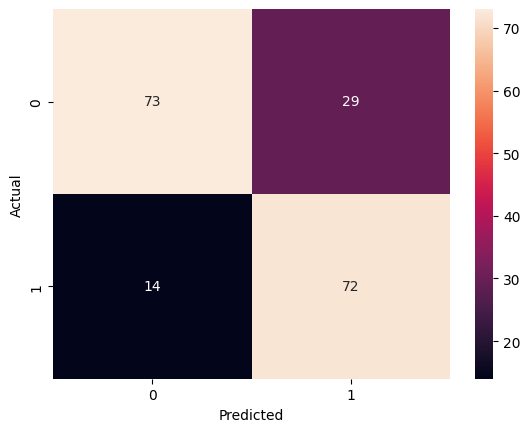

In [64]:
ConfusionMatrixDisplay = pd.crosstab(YUTest, YTestPred,
                                    rownames=['Actual'], colnames=['Predicted'])
sb.heatmap(ConfusionMatrixDisplay, annot=True, fmt=".0f")

In [65]:
ensemble.fit(XOTrain, YOTrain)

VotingClassifier(estimators=[('svm', SVC(probability=True, random_state=42)),
                             ('knn', KNeighborsClassifier(n_neighbors=3)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=3000,
                                                     random_state=42))],
                 voting='soft')

In [66]:
YTestPred = ensemble.predict(XOTest)
YTrainPred = ensemble.predict(XOTrain)
print("Train : " , classification_report(YOTrain, YTrainPred))
print("Test : ", classification_report(YOTest, YTestPred))

Train :                precision    recall  f1-score   support

           0       0.82      0.93      0.87       374
           1       0.92      0.80      0.86       377

    accuracy                           0.87       751
   macro avg       0.87      0.87      0.87       751
weighted avg       0.87      0.87      0.87       751

Test :                precision    recall  f1-score   support

           0       0.71      0.82      0.76       163
           1       0.79      0.66      0.72       160

    accuracy                           0.74       323
   macro avg       0.75      0.74      0.74       323
weighted avg       0.75      0.74      0.74       323



In [67]:
print("Train : " , roc_auc_score(YOTrain, YTrainPred))
print("Test : ", roc_auc_score(YOTest, YTestPred))

Train :  0.8670974056369593
Test :  0.7422929447852762


<Axes: xlabel='Predicted', ylabel='Actual'>

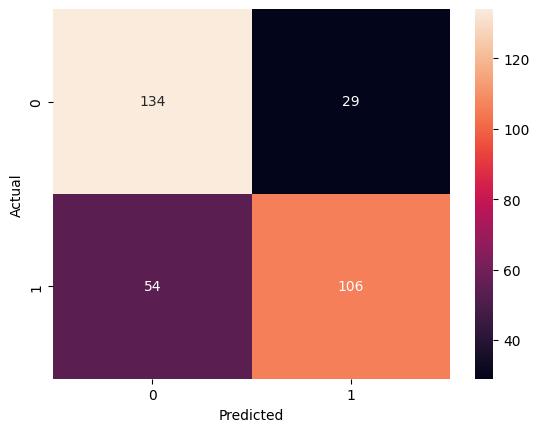

In [68]:
ConfusionMatrixDisplay = pd.crosstab(YOTest, YTestPred,
                                    rownames=['Actual'], colnames=['Predicted'])
sb.heatmap(ConfusionMatrixDisplay, annot=True, fmt=".0f")

#Try Meta Classifier (Stacking)

In [69]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [87]:
base_learners = [
    ('svm', SVC(probability=True, kernel='rbf', random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('dt', DecisionTreeClassifier(random_state=42))
]


In [88]:
meta_model = LogisticRegression()

In [94]:
stack = StackingClassifier(estimators=base_learners, final_estimator=meta_model, cv=5).fit(XTrain, YTrain)

In [95]:
YTestPred = stack.predict(XTest)
YTrainPred = stack.predict(XTrain)
print("Train : " , classification_report(YTrain, YTrainPred))
print("Test : ", classification_report(YTest, YTestPred))

Train :                precision    recall  f1-score   support

           0       0.90      0.98      0.94       368
           1       0.96      0.83      0.89       226

    accuracy                           0.92       594
   macro avg       0.93      0.90      0.92       594
weighted avg       0.93      0.92      0.92       594

Test :                precision    recall  f1-score   support

           0       0.82      0.82      0.82       169
           1       0.64      0.64      0.64        86

    accuracy                           0.76       255
   macro avg       0.73      0.73      0.73       255
weighted avg       0.76      0.76      0.76       255



In [96]:
print("Train : " , roc_auc_score(YTrain, YTrainPred))
print("Test : ", roc_auc_score(YTest, YTestPred))

Train :  0.9042059445940746
Test :  0.7280514655291042


<Axes: xlabel='Predicted', ylabel='Actual'>

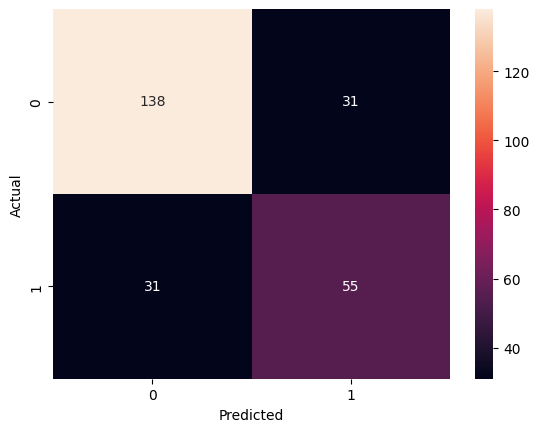

In [97]:
ConfusionMatrixDisplay = pd.crosstab(YTest, YTestPred,
                                    rownames=['Actual'], colnames=['Predicted'])
sb.heatmap(ConfusionMatrixDisplay, annot=True, fmt=".0f")